<a href="https://colab.research.google.com/github/yananma/5_programs_per_day/blob/master/0508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 线性回归

In [0]:
# !pip install mxnet d2l

In [0]:
from mxnet import nd 
from time import time  

a = nd.ones(shape=1000)
b = nd.ones(shape=1000)

In [3]:
start = time()
c = nd.zeros(shape=1000)
for i in range(1000):
    c[i] = a[i] + b[i]
time() - start 

0.24414825439453125

In [4]:
start = time()
d = a + b 
time() - start 

0.0006997585296630859

In [5]:
a = nd.ones(shape=3)
b = 10 
a + b 


[11. 11. 11.]
<NDArray 3 @cpu(0)>

In [0]:
import numpy as np 

a = np.ones(shape=1000)
b = np.ones(shape=1000)

In [7]:
start = time()
c = a + b 
time() - start 

0.0002562999725341797

In [8]:
start = time()
d = np.zeros(shape=1000)
for i in range(1000):
    d[i] = a[i] + b[i]
time() - start 

0.0014061927795410156

## 3.2 线性回归的从零开始实现

In [0]:
%matplotlib inline 
from IPython import display 
from matplotlib import pyplot as plt 
from mxnet import autograd, nd 
import random 

In [0]:
num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b 
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [11]:
features[:10]


[[ 2.2122064   0.7740038 ]
 [ 1.0434403   1.1839255 ]
 [ 1.8917114  -1.2347414 ]
 [-1.771029   -0.45138445]
 [ 0.57938355 -1.856082  ]
 [-1.9768796  -0.20801921]
 [ 0.2444218  -0.03716067]
 [-0.48774993 -0.02261727]
 [ 0.57461417  1.4661262 ]
 [ 0.6862904   0.35496104]]
<NDArray 10x2 @cpu(0)>

In [12]:
labels[:10]


[ 6.000587    2.2676215  12.192286    2.1933131  11.677933    0.94550216
  4.813502    3.310762    0.36797315  4.3735065 ]
<NDArray 10 @cpu(0)>

In [13]:
features.shape, labels.shape

((1000, 2), (1000,))

In [0]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

In [0]:
def set_figsize(figsize=(5, 3.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize 

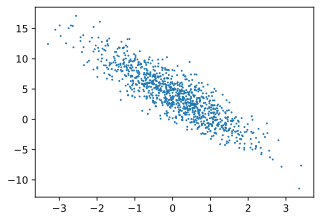

In [16]:
set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

In [0]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)

In [18]:
num = 10 
num

10

In [19]:
indice = list(range(10))
indice

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
random.shuffle(indice)
indice

[9, 4, 6, 3, 5, 2, 0, 7, 8, 1]

In [21]:
for i in range(0, num, 3):
    print(i)

0
3
6
9


In [22]:
for i in range(0, num, 3):
    j = nd.array(indice[i: i+3])
    print(j)


[9. 4. 6.]
<NDArray 3 @cpu(0)>

[3. 5. 2.]
<NDArray 3 @cpu(0)>

[0. 7. 8.]
<NDArray 3 @cpu(0)>

[1.]
<NDArray 1 @cpu(0)>


In [23]:
for i in range(0, num, 3):
    j = nd.array(indice[i: min(i+3, num)])
    print(i, j)
    # print('-'*19)
    print()

0 
[9. 4. 6.]
<NDArray 3 @cpu(0)>

3 
[3. 5. 2.]
<NDArray 3 @cpu(0)>

6 
[0. 7. 8.]
<NDArray 3 @cpu(0)>

9 
[1.]
<NDArray 1 @cpu(0)>



In [24]:
batch_size = 11 

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break 


[[ 1.8117208   0.43412206]
 [ 1.8544905   0.3756803 ]
 [ 0.82003313 -0.74541706]
 [ 0.5130225  -1.0972124 ]
 [-0.34685898 -1.0807394 ]
 [-0.59959525  1.1720713 ]
 [-0.36003703 -0.98934996]
 [-1.480558   -0.68010134]
 [-0.23647429 -0.2963644 ]
 [-0.1461925  -0.31820193]
 [ 1.0731696   0.12017461]]
<NDArray 11x2 @cpu(0)> 
[ 6.364592   6.626644   8.348353   8.966415   7.186714  -0.9730663
  6.859651   3.5594604  4.7410684  4.9912653  5.927642 ]
<NDArray 11 @cpu(0)>


In [0]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1, ))

In [0]:
w.attach_grad()
b.attach_grad()

In [0]:
def linreg(X, w, b):
    return nd.dot(X, w) + b 

In [0]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 

In [0]:
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size 

In [30]:
lr = 0.03 
num_epochs = 3 
net = linreg 
loss = squared_loss 

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.069961
epoch 2, loss 0.000358
epoch 3, loss 0.000052


In [31]:
true_w, w

([2, -3.4], 
 [[ 1.9995391]
  [-3.3990495]]
 <NDArray 2x1 @cpu(0)>)

In [32]:
true_b, b 

(4.2, 
 [4.198837]
 <NDArray 1 @cpu(0)>)

In [0]:
y_hat = nd.ones((3, 4))

In [0]:
y = nd.ones((2, 6))

In [35]:
y_hat - y.reshape(y_hat.shape) 


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
<NDArray 3x4 @cpu(0)>

## 3.3 线性回归的简洁实现

In [36]:
from mxnet import autograd, nd 

num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4]
true_b = 4.2 
start = time()
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b + nd.random.normal(scale=0.01, shape=labels.shape)
time() - start 

0.0025589466094970703

In [37]:
labels.shape

(1000,)

In [38]:
labels[:10]


[ 4.902419   2.1094513  8.48928    5.673833   2.384568   4.539225
  5.7347293 -2.681284  -1.342022   1.3345029]
<NDArray 10 @cpu(0)>

In [0]:
from mxnet.gluon import data as gdata 

batch_size = 10 
dataset = gdata.ArrayDataset(features, labels)
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

In [40]:
for X, y in data_iter:
    print(X, y)
    break 


[[-0.43589342 -0.6819574 ]
 [ 1.4181082   0.4986948 ]
 [ 0.68489146 -0.5334708 ]
 [ 0.7378336   0.47280213]
 [-0.08998236  0.58217776]
 [ 0.13737841 -1.8451521 ]
 [ 2.056204   -1.1895847 ]
 [-1.541703    0.41695568]
 [ 2.1725886  -0.31501594]
 [ 0.41033915 -0.3705225 ]]
<NDArray 10x2 @cpu(0)> 
[ 5.648432    5.348625    7.3559237   4.0688596   2.0494726  10.735916
 12.360003   -0.30428407  9.619968    6.277244  ]
<NDArray 10 @cpu(0)>


In [41]:
a = nd.ones((10, 2))
b = nd.zeros((10, 1))
data_ab = gdata.ArrayDataset(a, b)
print(data_ab.__getitem__([1, 2, 3]))

(
[[1. 1.]
 [1. 1.]
 [1. 1.]]
<NDArray 3x2 @cpu(0)>, 
[[0.]
 [0.]
 [0.]]
<NDArray 3x1 @cpu(0)>)


In [0]:
data_iter_ab = gdata.DataLoader(data_ab, 2, shuffle=False)

In [43]:
for A, b in data_iter_ab:
    print(A, b)


[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)> 
[[0.]
 [0.]]
<NDArray 2x1 @cpu(0)>

[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)> 
[[0.]
 [0.]]
<NDArray 2x1 @cpu(0)>

[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)> 
[[0.]
 [0.]]
<NDArray 2x1 @cpu(0)>

[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)> 
[[0.]
 [0.]]
<NDArray 2x1 @cpu(0)>

[[1. 1.]
 [1. 1.]]
<NDArray 2x2 @cpu(0)> 
[[0.]
 [0.]]
<NDArray 2x1 @cpu(0)>


In [0]:
from mxnet.gluon import nn

net = nn.Sequential()

In [0]:
net.add(nn.Dense(1))

In [0]:
from mxnet import init 

net.initialize(init.Normal(sigma=0.01))

In [0]:
from mxnet.gluon import loss as gloss 

loss = gloss.L2Loss()

In [0]:
from mxnet import gluon 

trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

In [49]:
num_epochs = 3 
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.034001
epoch 2, loss: 0.000121
epoch 3, loss: 0.000050


In [50]:
dense = net[0]
true_w, dense.weight.data()

([2, -3.4], 
 [[ 2.000078  -3.3996792]]
 <NDArray 1x2 @cpu(0)>)

In [51]:
true_b, dense.bias.data()

(4.2, 
 [4.1992364]
 <NDArray 1 @cpu(0)>)